In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

In [3]:
with_mask=glob('with_mask 1/with_mask 1/*.jpg')
without_mask=glob('without_mask/without_mask/*.jpg')

In [5]:
classes={0:'With Mask',1:'Without Mask'}

In [7]:
images=[]
labels=[]

for i in with_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in without_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

In [8]:
from sklearn.utils import shuffle

In [9]:
images,labels=shuffle(images,labels)

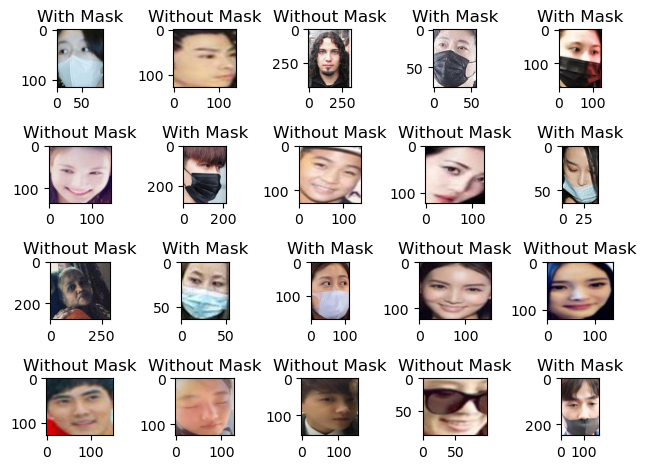

In [10]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [11]:
from skimage.transform import resize

In [12]:
x=[]

for i in images:
    x.append(resize(i,(64,64,3)))

In [13]:
x=np.array(x)
y=np.array(labels)

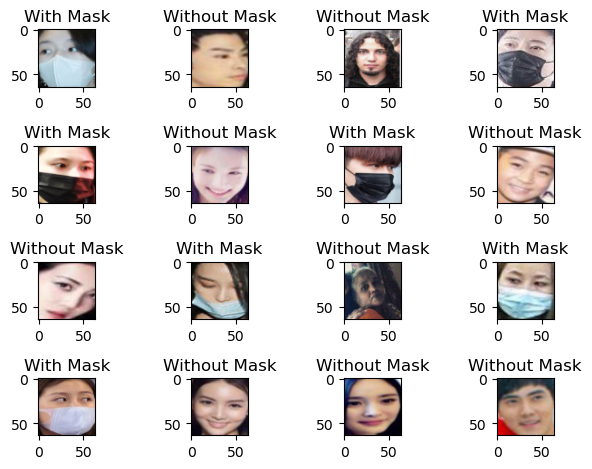

In [15]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(classes[y[i]])
plt.tight_layout()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
import tensorflow_hub as hub

In [35]:
trained_model="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [36]:
hub.load(trained_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x241686136d0>

In [37]:
from tensorflow.keras import Sequential,layers

In [38]:
model=Sequential([
    hub.KerasLayer(trained_model,input_shape=(64,64,3),trainable=False),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14,activation='relu'),
    
    layers.Dense(1,activation='sigmoid')
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 4,132,473
Trainable params: 82,909
Non-trainable params: 4,049,564
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(x_train,y_train,epochs=5,validation_split=0.05)

Epoch 1/5
83/83 [==============================] - 53s 417ms/step - loss: 0.1516 - accuracy: 0.9377 - val_loss: 0.1388 - val_accuracy: 0.9786
Epoch 2/5
83/83 [==============================] - 21s 257ms/step - loss: 0.0464 - accuracy: 0.9838 - val_loss: 0.1650 - val_accuracy: 0.9500
Epoch 3/5
83/83 [==============================] - 20s 245ms/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.1481 - val_accuracy: 0.9429
Epoch 4/5
83/83 [==============================] - 20s 240ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.1044 - val_accuracy: 0.9643
Epoch 5/5
83/83 [==============================] - 20s 240ms/step - loss: 0.0130 - accuracy: 0.9985 - val_loss: 0.1223 - val_accuracy: 0.9643


In [42]:
y_pred=model.predict(x_test)

22/22 [==============================] - 8s 226ms/step


In [46]:
predicted=[]

for i in y_pred:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

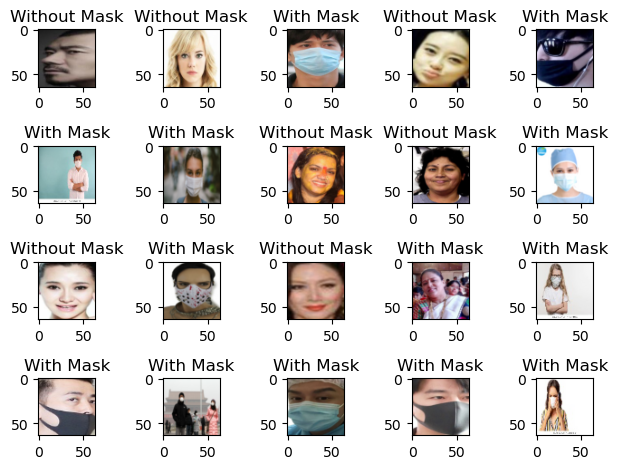

In [48]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i])
    plt.title(classes[predicted[i]])
plt.tight_layout()

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
accuracy_score(y_test,predicted)

0.9770773638968482

<AxesSubplot:>

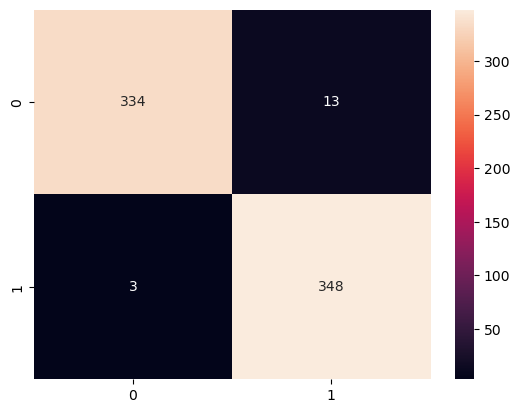

In [53]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [55]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       347
           1       0.96      0.99      0.98       351

    accuracy                           0.98       698
   macro avg       0.98      0.98      0.98       698
weighted avg       0.98      0.98      0.98       698

